In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('eda_data.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python,R,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,28,0,0,0,1,0,data scientist,senior,3431,3
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,53,0,0,0,0,0,data scientist,na,4110,0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,40,1,0,0,1,1,data scientist,na,8844,0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,21,1,0,0,1,1,data scientist,na,3381,3
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,23,1,0,0,0,1,data scientist,na,2748,3


In [3]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [4]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','employer_provided',
             'job_state','same_state','age','python','spark','aws','excel','job_simp','seniority','desc_len']]


In [5]:
df_dummy = pd.get_dummies(df_model)

In [6]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
X = df_dummy.drop('avg_salary',axis=1)
y = df_dummy['avg_salary'].values
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [7]:
X_train.shape

(537, 341)

In [8]:
# starting with basic model
# Linear Regression 
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error as mse
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train,y_train)
pred_LR = lm.predict(X_test)
print("RMSE : ",mse(pred_LR,y_test,squared=True))
print("Cross Val Score: ",np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))

RMSE :  32201459912.02459
Cross Val Score:  -778972.4171816609


In [9]:
# Lasso
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
pred_LR_L = lm_l.predict(X_test)
print("RMSE : ",mse(pred_LR_L,y_test,squared=True))
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

RMSE :  1263.596600328767


-30.525390656663152

In [10]:
# Tuning Lasso
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    

C:\Users\Sreya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4129.842725377122, tolerance: 62.54588212290502
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sreya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2186.10534107234, tolerance: 60.34520670391062
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'error')

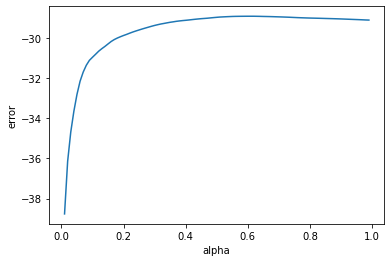

In [11]:
plt.plot(alpha,error)
plt.xlabel("alpha")
plt.ylabel('error')

In [12]:
alpha[error.index(max(error))]


0.6

At alpha =0.6 we have maximum neg MAE we should consider maximum because we are calculating negative value

In [13]:
# Lasso
lm_l = Lasso(alpha=0.6)
lm_l.fit(X_train,y_train)
pred_LR_L = lm_l.predict(X_test)
print("RMSE : ",mse(pred_LR_L,y_test,squared=True))
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

RMSE :  1200.1221007724469


-28.90750696174753

In [14]:
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor

In [15]:
#Let's try cross-valdation with multiple models
models = {
    "LinearRegression": LinearRegression(),
    "lasso Regression" : Lasso(alpha =0.6),
    "KNearest": KNeighborsRegressor(),
    "Support Vector regressor": svm.SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "Randomforest": RandomForestRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "AdaBoost" : AdaBoostRegressor(),
}

In [16]:
for key, model in models.items():
    training_score = np.mean(cross_val_score(model,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))
    print(model.__class__.__name__, "Has ", training_score, " cross val score")

LinearRegression Has  -778972.4171816609  cross val score
Lasso Has  -28.90750696174753  cross val score
KNeighborsRegressor Has  -31.981378026070768  cross val score
SVR Has  -27.397288646697636  cross val score
DecisionTreeRegressor Has  -38.02172563625077  cross val score
RandomForestRegressor Has  -31.756180663093375  cross val score
GradientBoostingRegressor Has  -29.886492628618953  cross val score
AdaBoostRegressor Has  -32.94848619605334  cross val score


We can observe that SVR has less cross val score
Let's try to tune the model using gridSearchCV

In [20]:
Parameters = {'kernel':('rbf','linear','poly'),
              'degree':(3,5,7),
              'C':[1,5,10],
              'coef0':[0.01,10,0.5],
              }

In [22]:
grid_svr = GridSearchCV(svm.SVR(),Parameters,cv=3,scoring='neg_mean_absolute_error',verbose=True)
grid_svr.fit(X_train,y_train)
best_svr = grid_svr.best_estimator_
pred_svr = grid_svr.predict(X_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [82]:
parameters = {'n_estimators':range(60,101,10),'criterion':['mae','mse']}

gs = GridSearchCV(RandomForestRegressor(),parameters,scoring='neg_mean_absolute_error',cv=3,verbose=True)
gs.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mae', 'mse'],
                         'n_estimators': range(60, 101, 10)},
             scoring='neg_mean_absolute_error', verbose=True)

In [84]:
gs.best_score_
gs.best_estimator_


RandomForestRegressor(n_estimators=60)

In [59]:
print(grid_svr.best_estimator_)
print(grid_svr.best_score_)
print(mse(pred_svr,y_test,squared=True))

SVR(C=1, coef0=0.01, degree=5, kernel='poly')
-27.3120831223968
1181.1068713143181


In [85]:
import pickle
pickl = {'model': grid_svr.best_estimator_}
pickle.dump( pickl, open( 'model' + ".p", "wb" ) )

file_name = "model.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [87]:
pred = model.predict(np.array(list(X_test.iloc[0,:])).reshape(1,-1))[0]
print(pred)
print(y_test[0])

113.8983730740679
134.0
